In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

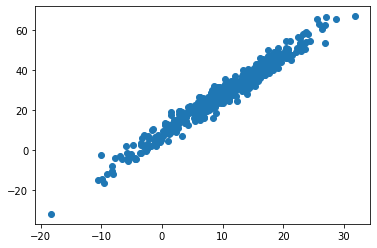

In [2]:
x=np.random.normal(10,8,500)
y=3 + 2*x +np.random.normal(5,3,500)
plt.plot(x,y,'o')

In [3]:
def train_test_split_with_bias(feature,target,test_ratio=0.3):
    '''This function will split the data into training and test
    and return x_train, x_test, y_train, y_test with sampling bias'''
    if len(feature)==len(target):
        #training data
        x_train = []
        y_train = []
        #test data
        x_test = []
        y_test = []
        #train ratio (by default 7:3)
        train_ratio = 1-test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        
        x_train.extend(feature[:train_size])
        y_train.extend(target[:train_size])
        x_test.extend(feature[train_size:])
        y_test.extend(target[train_size:])
        return np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)
    else:
        return 'Length Mismatch'

In [4]:
class MyLinearRegression:
    def __init__(self):
        self._coef=None
        self._intercept=None
    
    def fit(self,feature,target):
        '''This methods will make our model learn and find the 
        best values for coeffiecient and intercept'''
        feature=np.array(feature)
        target=np.array(target)
        a=sum((feature-feature.mean()) * (target-target.mean()))
        b=sum((feature-feature.mean())**2)
        self._coef=a/b
        self._intercept=target.mean()-(self._coef*feature.mean())
        
    def predict(self,x_test):
        try:
            len(x_test)
        except:
            raise ValueError('Testing Data Should Be Iterable Object')
        else:
            y_test=[]
            for x in x_test:
                y_test.append(self._intercept+self._coef*x)
            return np.array(y_test)
        
    def mae(self,y,y_hat):
        return (abs((y-y_hat)).sum())/len(y)
    
    def mse(self,y,y_hat):
        return (((y-y_hat)**2).sum())/len(y)
    
    
    def rmse(self,y,y_hat):
        return np.sqrt((((y-y_hat)**2).sum())/len(y))
    
    def r2_score(self,y,y_hat):
        r2score= 1- (sum((y-y_hat)**2)/sum((y-y.mean())**2))
        return r2score

In [5]:
model=MyLinearRegression()

In [6]:
x_train,x_test,y_train,y_test=train_test_split_with_bias(x,y)

In [7]:
len(x_train)

350

In [8]:
len(x_test)

150

In [9]:
len(y_train)

350

In [10]:
len(y_test)

150

In [11]:
model.fit(x_train,y_train)

In [12]:
model._coef

1.9907788187743227

In [13]:
model._intercept

8.252319304548795

In [14]:
pred=model.predict(x_test)

In [15]:
y_test[:5]

array([40.91859652, 37.11800791, 42.98972121,  6.83995004, 25.38436291])

In [16]:
pred[:5]

array([46.3566787 , 34.43196258, 42.60174314, 14.83188138, 23.97435008])

In [17]:
model.mse(y_test,pred)

8.165721496655904

In [18]:
model.r2_score(y_test,pred)

0.9662513397725936

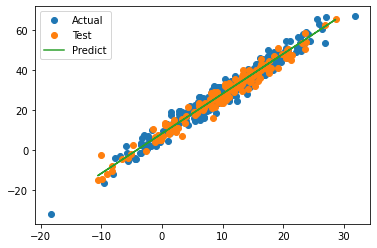

In [19]:
plt.plot(x_train,y_train,'o',label='Actual')
plt.plot(x_test,y_test,'o',label='Test')
plt.plot(x_test,pred,'-',label='Predict')
plt.legend()
plt.show()

Splitting data without sampling bias

In [20]:
def train_test_split_without_bias(feature,target,test_ratio=0.3):
    '''This function will split the data into training and test
    and return x_train, x_test, y_train, y_test with sampling bias'''
    if len(feature)==len(target):
        #training data
        x_train = []
        y_train = []
        #test data
        x_test = []
        y_test = []
        #train/test ratio (by default 7:3)
        train_ratio = 1-test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        #storing the indexes and then dividing indexes in  7:3
        indicies = np.random.permutation(range(len(feature)))
        train_ind = indicies[:train_size]
        test_ind = indicies[train_size:]
        #filling the values 
        x_train.extend(feature[train_ind])
        y_train.extend(target[train_ind])
        x_test.extend(feature[test_ind])
        y_test.extend(target[test_ind])
        return np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)
    else:
        return 'Length Mismatch'

In [21]:
model=MyLinearRegression()

In [22]:
x_train,x_test,y_train,y_test=train_test_split_without_bias(x,y)

In [23]:
 model.fit(x_train,y_train)

In [24]:
model._coef

1.9726514933676587

In [25]:
model._intercept

8.154339841517622

In [26]:
test_pred=model.predict(x_test)
train_pred=model.predict(x_train)

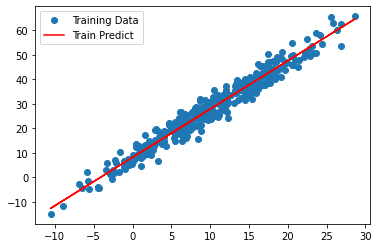

In [27]:
plt.plot(x_train,y_train,'o',label='Training Data')
plt.plot(x_train,train_pred,'r',label='Train Predict')
plt.legend()
plt.show()

In [28]:
model.mse(y_train,train_pred)

8.924518844061458

In [29]:
model.r2_score(y_train,train_pred)

0.9576071677745425

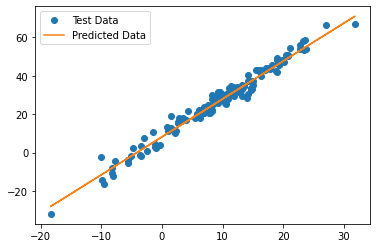

In [30]:
plt.plot(x_test,y_test,'o',label='Test Data')
plt.plot(x_test,test_pred,'-',label='Predicted Data')
plt.legend()
plt.show()

In [31]:
model.mse(y_test,test_pred)

8.044301747490197

In [32]:
model.r2_score(y_test,test_pred)

0.972758570629161

Checking accuracy

In [33]:
model1=MyLinearRegression()
x_train,x_test,y_train,y_test=train_test_split_with_bias(x,y)
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
acc1=model1.r2_score(y_test,pred1)
print('Accuracy of model with bias splitting: ',acc1)

model2=MyLinearRegression()
x_train,x_test,y_train,y_test=train_test_split_without_bias(x,y)
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
acc2=model2.r2_score(y_test,pred2)
print('Accuracy of model without bias splitting: ',acc2)

Accuracy of model with bias splitting:  0.9662513397725936
Accuracy of model without bias splitting:  0.9600004529738794


Using Sklearn

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [35]:
lin_model=LinearRegression()
lin_model.fit(x_train.reshape(-1,1),y_train)
lin_pred=lin_model.predict(x_test.reshape(-1,1))
r2_score(y_test,lin_pred)

0.9600004529738794

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [37]:
x_train[:5]

array([10.47985598, -5.13347074,  8.17786982, 12.58971553, 22.50603094])

In [38]:
x_test[:5]

array([-3.67424083, 11.3227693 ,  1.3909572 , 12.31252995,  9.24206468])

In [39]:
y_train[:5]

array([35.65612181, -1.72939035, 26.96344732, 33.0708367 , 56.63348906])

In [40]:
y_test[:5]

array([-1.38602339, 32.78763127,  9.7099566 , 24.37528317, 24.53058923])

Taking datasets

In [41]:
tip=sns.load_dataset('tips')

In [42]:
feature=tip['total_bill']
target=tip['tip']

In [43]:
x_train,x_test,y_train,y_test=train_test_split_without_bias(feature,target)

In [44]:
len(x_train)

170

In [45]:
len(x_test)

74

In [46]:
mymodel=MyLinearRegression()
mymodel.fit(x_train,y_train)
mypred=mymodel.predict(x_test)
acc1=mymodel.r2_score(y_test,mypred)
err1=mymodel.mae(y_test,mypred)
print('Accuracy:',acc1)
print('Error:',err1)
print()

model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
pred=model.predict(x_test.reshape(-1,1))
acc2=r2_score(y_test,pred)
err2=mean_absolute_error(y_test,pred)
print('Accuracy:',acc2)
print('Error:',err2)

Accuracy: 0.0702704770841317
Error: 0.859569881514841

Accuracy: 0.07027047708413281
Error: 0.859569881514841


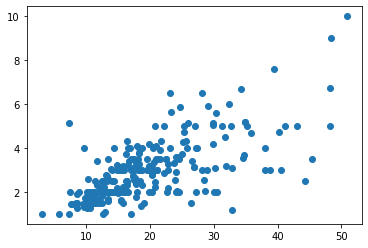

In [47]:
plt.plot(feature,target,'o')

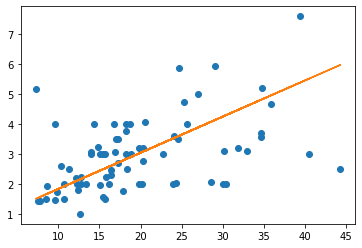

In [48]:
plt.plot(x_test,y_test,'o',label='Actual')
plt.plot(x_test,pred,'-',label='Actual')
plt.show()

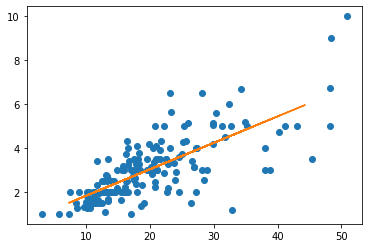

In [49]:
plt.plot(x_train,y_train,'o',label='Actual')
plt.plot(x_test,pred,'-',label='Actual')
plt.show()

New Dataset

In [50]:
covid=pd.read_csv('covid_19_data.csv')

In [51]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


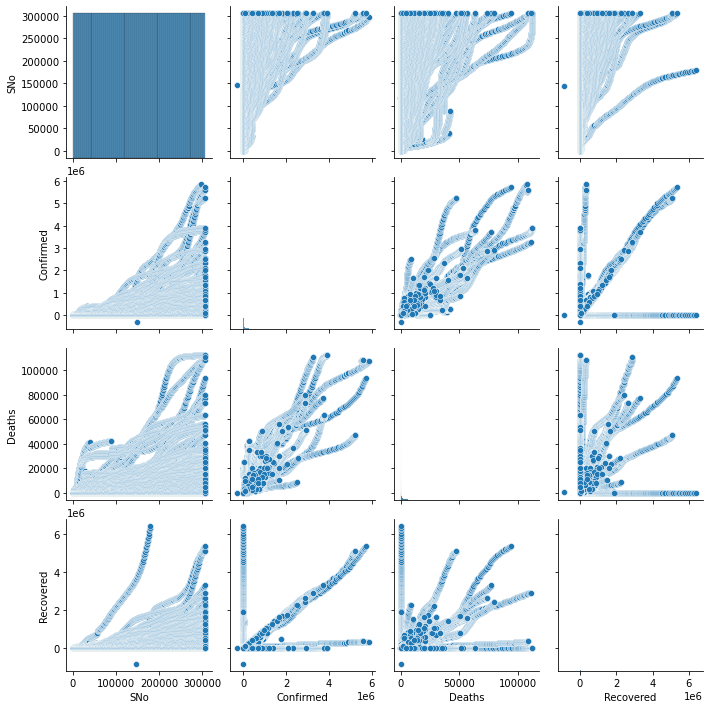

In [52]:
sns.pairplot(covid)

In [56]:
feature=covid['Confirmed']
target=covid['Deaths']

In [66]:
x_train,x_test,y_train,y_test=train_test_split_without_bias(feature,target)

mymodel=MyLinearRegression()
mymodel.fit(x_train,y_train)
mypred=mymodel.predict(x_test)
acc1=mymodel.r2_score(y_test,mypred)
err1=mymodel.mae(y_test,mypred)
print('Accuracy:',acc1)
print('Error:',err1)
print()

model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
pred=model.predict(x_test.reshape(-1,1))
acc2=r2_score(y_test,pred)
err2=mean_absolute_error(y_test,pred)
print('Accuracy:',acc2)
print('Error:',err2)

Accuracy: 0.7901814243925398
Error: 1032.4081073643158

Accuracy: 0.7901814243925182
Error: 1032.408107364369


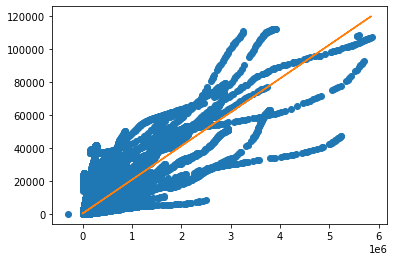

In [67]:
plt.plot(x_train,y_train,'o',label='Actual')
plt.plot(x_test,pred,'-',label='Actual')
plt.show()